In [122]:
import numpy as np
import pandas as pd
import math
import datetime
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [123]:
data2 = pd.read_csv('time_series_covid19_confirmed_global(1).csv')
data2 = data2.groupby('Country/Region').sum().iloc[:,2:].T
data2.index = pd.to_datetime(data2.index)
country_20_confirmed = ['China','US','United Kingdom','Germany','Canada','France','South Africa','Korea, South','Italy','Australia','Afghanistan','Finland','Panama','Japan','Libya','Guinea-Bissau','Dominican Republic','Grenada','Turkey','Maldives']
country_20_confirmed = data2[country_20_confirmed]
country_20_confirmed 

Country/Region  China       US  United Kingdom  Germany  Canada  France  \
2020-01-22        548        1               0        0       0       0   
2020-01-23        643        1               0        0       0       0   
2020-01-24        920        2               0        0       0       2   
2020-01-25       1406        2               0        0       0       3   
2020-01-26       2075        5               0        0       1       3   
...               ...      ...             ...      ...     ...     ...   
2020-06-12      84228  2048986          294402   187226   99595  193220   
2020-06-13      84286  2074526          295828   187267  100043  193746   
2020-06-14      84335  2094058          297342   187518  100404  194153   
2020-06-15      84378  2114026          298315   187682  100763  194305   
2020-06-16      84422  2137731          299600   188252  101087  194347   

Country/Region  South Africa  Korea, South   Italy  Australia  Afghanistan  \
2020-01-22                 0             1       0          0            0   
2020-01-23                 0             1       0          0            0   
2020-01-24                 0             2       0          0            0   
2020-01-25                 0             2       0          0            0   
2020-01-26                 0             3       0          4            0   
...                      ...           ...     ...        ...          ...   
2020-06-12             61927         12051  236305       7294        23546   
2020-06-13             65736         12085  236651       7320        24102   
2020-06-14             70038         12121  236989       7335        24766   
2020-06-15             73533         12155  237290       7347        25527   
2020-06-16             76334         12198  237500       7370        26310   

Country/Region  Finland  Panama  Japan  Libya  Guinea-Bissau  \
2020-01-22            0       0      2      0              0   
2020-01-23            0       0      2      0              0   
2020-01-24            0       0      2      0              0   
2020-01-25            0       0      2      0              0   
2020-01-26            0       0      4      0              0   
...                 ...     ...    ...    ...            ...   
2020-06-12         7073   19211  17250    409           1460   
2020-06-13         7087   20059  17293    418           1460   
2020-06-14         7104   21418  17369    454           1460   
2020-06-15         7108   21422  17439    467           1492   
2020-06-16         7112   21962  17484    484           1492   

Country/Region  Dominican Republic  Grenada  Turkey  Maldives  
2020-01-22                       0        0       0         0  
2020-01-23                       0        0       0         0  
2020-01-24                       0        0       0         0  
2020-01-25                       0        0       0         0  
2020-01-26                       0        0       0         0  
...                            ...      ...     ...       ...  
2020-06-12                   22008       23  175218      2003  
2020-06-13                   22572       23  176677      2013  
2020-06-14                   22962       23  178239      2035  
2020-06-15                   23271       23  179831      2065  
2020-06-16                   23686       23  181298      2094  

[147 rows x 20 columns]

In [124]:
data2 = pd.read_csv('time_series_covid19_deaths_global(1).csv')
data2 = data2.groupby('Country/Region').sum().iloc[:,2:].T
data2.index = pd.to_datetime(data2.index)
country_20_deaths = ['China','US','United Kingdom','Germany','Canada','France','South Africa','Korea, South','Italy','Australia','Afghanistan','Finland','Panama','Japan','Libya','Guinea-Bissau','Dominican Republic','Grenada','Turkey','Maldives']
country_20_deaths = data2[country_20_deaths]
country_20_deaths 

Country/Region  China      US  United Kingdom  Germany  Canada  France  \
2020-01-22         17       0               0        0       0       0   
2020-01-23         18       0               0        0       0       0   
2020-01-24         26       0               0        0       0       0   
2020-01-25         42       0               0        0       0       0   
2020-01-26         56       0               0        0       0       0   
...               ...     ...             ...      ...     ...     ...   
2020-06-14       4638  115732           41783     8801    8218   29410   
2020-06-15       4638  116127           41821     8807    8228   29439   
2020-06-16       4638  116963           42054     8820    8271   29550   
2020-06-17       4638  117717           42238     8851    8312   29578   
2020-06-18       4638  118434           42373     8875    8361   29606   

Country/Region  South Africa  Korea, South  Italy  Australia  Afghanistan  \
2020-01-22                 0             0      0          0            0   
2020-01-23                 0             0      0          0            0   
2020-01-24                 0             0      0          0            0   
2020-01-25                 0             0      0          0            0   
2020-01-26                 0             0      0          0            0   
...                      ...           ...    ...        ...          ...   
2020-06-14              1480           277  34345        102          471   
2020-06-15              1568           278  34371        102          478   
2020-06-16              1625           279  34405        102          491   
2020-06-17              1674           280  34448        102          504   
2020-06-18              1737           280  34514        102          546   

Country/Region  Finland  Panama  Japan  Libya  Guinea-Bissau  \
2020-01-22            0       0      0      0              0   
2020-01-23            0       0      0      0              0   
2020-01-24            0       0      0      0              0   
2020-01-25            0       0      0      0              0   
2020-01-26            0       0      0      0              0   
...                 ...     ...    ...    ...            ...   
2020-06-14          326     437    927     10             15   
2020-06-15          326     448    929     10             15   
2020-06-16          326     457    934     10             15   
2020-06-17          326     470    935     10             15   
2020-06-18          326     475    935     10             15   

Country/Region  Dominican Republic  Grenada  Turkey  Maldives  
2020-01-22                       0        0       0         0  
2020-01-23                       0        0       0         0  
2020-01-24                       0        0       0         0  
2020-01-25                       0        0       0         0  
2020-01-26                       0        0       0         0  
...                            ...      ...     ...       ...  
2020-06-14                     592        0    4807         8  
2020-06-15                     605        0    4825         8  
2020-06-16                     615        0    4842         8  
2020-06-17                     633        0    4861         8  
2020-06-18                     635        0    4882         8  

[149 rows x 20 columns]

In [125]:
data2 = pd.read_csv('time_series_covid19_recovered_global(1).csv')
data2 = data2.groupby('Country/Region').sum().iloc[:,2:].T
data2.index = pd.to_datetime(data2.index)
country_20_recovered = ['China','US','United Kingdom','Germany','Canada','France','South Africa','Korea, South','Italy','Australia','Afghanistan','Finland','Panama','Japan','Libya','Guinea-Bissau','Dominican Republic','Grenada','Turkey','Maldives']
country_20_recovered = data2[country_20_recovered]
country_20_recovered 

Country/Region  China      US  United Kingdom  Germany  Canada  France  \
2020-01-22         28       0               0        0       0       0   
2020-01-23         30       0               0        0       0       0   
2020-01-24         36       0               0        0       0       0   
2020-01-25         39       0               0        0       0       0   
2020-01-26         49       0               0        0       0       0   
...               ...     ...             ...      ...     ...     ...   
2020-06-14      79482  561816            1283   172089   60668   72982   
2020-06-15      79489  576334            1284   172692   61466   73168   
2020-06-16      79493  583503            1293   172842   61899   73459   
2020-06-17      79510  592191            1304   173599   63280   73791   
2020-06-18      79515  599115            1313   173847   63782   74011   

Country/Region  South Africa  Korea, South   Italy  Australia  Afghanistan  \
2020-01-22                 0             0       0          0            0   
2020-01-23                 0             0       0          0            0   
2020-01-24                 0             0       0          0            0   
2020-01-25                 0             0       0          0            0   
2020-01-26                 0             0       0          0            0   
...                      ...           ...     ...        ...          ...   
2020-06-14             38531         10730  176370       6851         4725   
2020-06-15             39867         10760  177010       6856         5164   
2020-06-16             42063         10774  178526       6861         5508   
2020-06-17             44331         10800  179455       6877         6158   
2020-06-18             44920         10835  180544       6878         7660   

Country/Region  Finland  Panama  Japan  Libya  Guinea-Bissau  \
2020-01-22            0       0      0      0              0   
2020-01-23            0       0      0      0              0   
2020-01-24            0       0      0      0              0   
2020-01-25            0       0      0      0              0   
2020-01-26            0       0      1      0              0   
...                 ...     ...    ...    ...            ...   
2020-06-14         6200   13766  15514     63            153   
2020-06-15         6200   13766  15567     70            153   
2020-06-16         6200   13774  15652     76            153   
2020-06-17         6200   13774  15753     78            153   
2020-06-18         6200   13782  15753     81            153   

Country/Region  Dominican Republic  Grenada  Turkey  Maldives  
2020-01-22                       0        0       0         0  
2020-01-23                       0        0       0         0  
2020-01-24                       0        0       0         0  
2020-01-25                       0        0       0         0  
2020-01-26                       0        0       0         0  
...                            ...      ...     ...       ...  
2020-06-14                   13320       22  151417      1311  
2020-06-15                   14025       22  152364      1540  
2020-06-16                   14133       22  153379      1670  
2020-06-17                   14216       22  154640      1677  
2020-06-18                   14293       23  156022      1677  

[149 rows x 20 columns]

In [126]:
country_20_Population=pd.read_csv("population_by_country_2020.csv",sep=',')
#country_20_Population=country_20_Population.rename(index={'United States':'US'})
country_20_Population

Country (or dependency)  Population (2020) Yearly Change  Net Change  \
0                     China         1438207241         0.39%     5540090   
1                     India         1377233523         0.99%    13586631   
2                        US          330610570         0.59%     1937734   
3                 Indonesia          272931713         1.07%     2898047   
4                  Pakistan          219992900         2.00%     4327022   
..                      ...                ...           ...         ...   
230              Montserrat               4991         0.06%           3   
231        Falkland Islands               3458         3.05%         103   
232                    Niue               1624         0.68%          11   
233                 Tokelau               1354         1.27%          17   
234                Holy See                801         0.25%           2   

     Density (P/Km²)  Land Area (Km²)  Migrants (net) Fert. Rate Med. Age  \
0                153          9388211       -348399.0        1.7       38   
1                464          2973190       -532687.0        2.2       28   
2                 36          9147420        954806.0        1.8       38   
3                151          1811570        -98955.0        2.3       30   
4                287           770880       -233379.0        3.6       23   
..               ...              ...             ...        ...      ...   
230               50              100             NaN       N.A.     N.A.   
231                0            12170             NaN       N.A.     N.A.   
232                6              260             NaN       N.A.     N.A.   
233              136               10             NaN       N.A.     N.A.   
234             2003                0             NaN       N.A.     N.A.   

    Urban Pop % World Share  
0           61%      18.47%  
1           35%      17.70%  
2           83%       4.25%  
3           56%       3.51%  
4           35%       2.83%  
..          ...         ...  
230         10%       0.00%  
231         66%       0.00%  
232         46%       0.00%  
233          0%       0.00%  
234        N.A.       0.00%  

[235 rows x 11 columns]

In [127]:
country_20_Population 

Country (or dependency)  Population (2020) Yearly Change  Net Change  \
0                     China         1438207241         0.39%     5540090   
1                     India         1377233523         0.99%    13586631   
2                        US          330610570         0.59%     1937734   
3                 Indonesia          272931713         1.07%     2898047   
4                  Pakistan          219992900         2.00%     4327022   
..                      ...                ...           ...         ...   
230              Montserrat               4991         0.06%           3   
231        Falkland Islands               3458         3.05%         103   
232                    Niue               1624         0.68%          11   
233                 Tokelau               1354         1.27%          17   
234                Holy See                801         0.25%           2   

     Density (P/Km²)  Land Area (Km²)  Migrants (net) Fert. Rate Med. Age  \
0                153          9388211       -348399.0        1.7       38   
1                464          2973190       -532687.0        2.2       28   
2                 36          9147420        954806.0        1.8       38   
3                151          1811570        -98955.0        2.3       30   
4                287           770880       -233379.0        3.6       23   
..               ...              ...             ...        ...      ...   
230               50              100             NaN       N.A.     N.A.   
231                0            12170             NaN       N.A.     N.A.   
232                6              260             NaN       N.A.     N.A.   
233              136               10             NaN       N.A.     N.A.   
234             2003                0             NaN       N.A.     N.A.   

    Urban Pop % World Share  
0           61%      18.47%  
1           35%      17.70%  
2           83%       4.25%  
3           56%       3.51%  
4           35%       2.83%  
..          ...         ...  
230         10%       0.00%  
231         66%       0.00%  
232         46%       0.00%  
233          0%       0.00%  
234        N.A.       0.00%  

[235 rows x 11 columns]

In [128]:
country_20_confirmed.index=range(147)
country_20_deaths.index=range(149)
country_20_recovered.index=range(149)

In [129]:
class estimationInfectionProb():
    def __init__(self, estUsedTimeIndexBox, nContact, gamma,CO):
        self.timeRange = np.array([i for i in range(estUsedTimeIndexBox[0],estUsedTimeIndexBox[1] + 1)])
        self.nContact, self.gamma = nContact, gamma
        self.dataStartTimeStep = 45
        self.CO = CO
    
    def setInitSolution(self, x0):
        self.x0 = 0.04
        
    def costFunction(self, infectionProb):
        #print(infectionData.wuHan.loc[self.timeRange - self.dataStartTimeStep,'累计确诊'])
        #print(np.exp((infectionProb * self.nContact - self.gamma) * self.timeRange))
        res = np.array(np.exp((infectionProb * self.nContact - self.gamma) * self.timeRange) - \
                       country_20_confirmed.loc[self.timeRange - self.dataStartTimeStep,CO])
        return (res**2).sum() / self.timeRange.size
    
    def optimize(self):
        self.solution = minimize(self.costFunction, self.x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})
        print('infection probaility: ', self.solution.x)
        return self.getSolution()
    
    def getSolution(self):
        return self.solution.x
    
    def getBasicReproductionNumber(self):
        self.basicReproductionNumber = self.nContact * self.solution.x[0] / (self.gamma)
        print("basic reproduction number:", self.basicReproductionNumber)
        return self.basicReproductionNumber

In [133]:
class wuHanSIRModel():
    def __init__(self, N, beta, gamma,CO):
        self.beta, self.gamma, self.N = beta, gamma, N
        self.t = np.linspace(0, 60, 61)
        self.setInitCondition()
        self.CO=CO
    
    def odeModel(self, population, t):
        diff = np.zeros(3)
        s,i,r = population
        diff[0] = - self.beta * s * i / self.N
        diff[1] = self.beta * s * i / self.N - self.gamma * i
        diff[2] = self.gamma * i
        return diff
    
    def setInitCondition(self):
        self.populationInit = [self.N -2137731, 1437265,8005]
        
    def solve(self):
        self.solution = odeint(self.odeModel,self.populationInit,self.t)
    
    def report(self):
        #plt.plot(self.solution[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
        #plt.plot(self.solution[:,0],color = 'red',label = 'Population',marker = '.')
        plt.plot(self.solution[:,1],color = 'orange',label = 'Infection',marker = '.')
        plt.plot(self.solution[:,2],color = 'green',label = 'Recovery',marker = '.')
        plt.title('SIR Model' + ' infectionProb = '+ str(infectionProb)+str(CO))
        plt.legend()
        plt.xlabel('Day')
        plt.ylabel('Number of people')
        plt.show()

Optimization terminated successfully.
         Current function value: 383879260522.357056
         Iterations: 33
         Function evaluations: 66
infection probaility:  [0.03006867]
basic reproduction number: 2.10480703383684


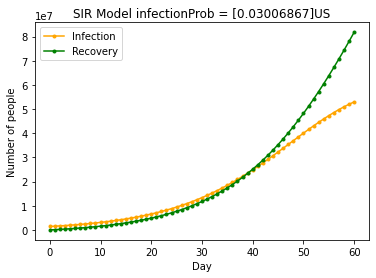

In [144]:
f = []
i = 0
for CO in ['China', 'US', 'United Kingdom', 'Germany', 'Canada', 'France', 'South Africa', 'Korea, South', 'Italy',
           'Australia', 'Afghanistan', 'Finland', 'Panama', 'Japan', 'Libya', 'Guinea-Bissau', 'Dominican Republic',
           'Grenada', 'Turkey', 'Maldives']:
    if CO == "US":

        startTime = datetime.datetime.strptime('2019-12-08', "%Y-%m-%d")
        estUsedTimeBox = [datetime.datetime.strptime('2020-01-22', "%Y-%m-%d"),
                          datetime.datetime.strptime('2020-06-16', "%Y-%m-%d")]
        estUsedTimeIndexBox = [(t - startTime).days for t in estUsedTimeBox]
        nContact, gamma = int(5), 1 / 14
        estInfectionProb = estimationInfectionProb(estUsedTimeIndexBox, nContact, gamma, CO)
        estInfectionProb.setInitSolution(0.04)
        infectionProb = estInfectionProb.optimize()
        basicReproductionNumber = estInfectionProb.getBasicReproductionNumber()
        N = country_20_Population[country_20_Population['Country (or dependency)'] == CO]
        f.append(N.iloc[:, 1])
        n_start = country_20_confirmed.loc[146, CO]
        solutionWithParameters = []
        if CO == "China":
            k = 2
        if CO == 'US':
            k = 5
        N = f[i]
        beta, gamma = k * infectionProb, 1 / 14
        wuHanSIRModel_ = wuHanSIRModel(N, beta, gamma, CO)
        wuHanSIRModel_.solve()
        wuHanSIRModel_.report()
        solutionWithParameters.append(wuHanSIRModel_.solution)